In [ ]:
from utils.train_data import sim_data_train
import pandas as pd

num_amostras = 5_000
l1 = 0.1
l2 = 0.124
l3 = 0.06
x_range = (-0.5, 0.5)
y_range = (-0.5, 0.5)
z_range = (-0.5, 0.5)
normalize = True
folds = 0

entradas, saidas = sim_data_train(
    num_amostras=num_amostras, 
    l1=l1, l2=l2, l3=l3, 
    x_range=x_range, y_range=y_range, z_range=z_range,
    normalize=normalize, folds=folds
)

df = pd.DataFrame(entradas, columns=["x", "y", "z", "x_final", "y_final", "z_final", "axis0", "axis1", "axis2", "axis3"])
df["axis0_final"] = saidas[:, 0]
df["axis1_final"] = saidas[:, 1]
df["axis2_final"] = saidas[:, 2]
df["axis3_final"] = saidas[:, 3]

df.head()


,x,y,z,x_final,y_final,z_final,axis0,axis1,axis2,axis3,axis0_final,axis1_final,axis2_final,axis3_final
0,0.278313,0.197886,0.851578,0.969726,0.506244,0.644033,0.502076,0.550090,1.0,0.194515,0.502076,0.550090,1.0,0.194515
1,0.944198,0.559738,0.110762,0.024289,0.167246,0.634488,0.096896,0.536949,1.0,0.205472,0.096896,0.536949,1.0,0.205472
2,0.297302,0.102148,0.737356,0.230195,0.910314,0.646646,0.842563,0.548592,1.0,0.195765,0.842563,0.548592,1.0,0.195765
3,0.060743,0.892425,0.927536,0.025040,0.958327,0.165080,0.877835,0.414409,1.0,0.307636,0.877835,0.414409,1.0,0.307636
4,0.402269,0.177327,0.129783,0.717905,0.967122,0.902433,0.680551,0.614172,1.0,0.141089,0.680551,0.614172,1.0,0.141089


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(entradas, saidas, test_size=0.2, random_state=42)

# Parâmetros do RandomizedSearchCV
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp = MLPRegressor(random_state=42)

random_search = RandomizedSearchCV(
    mlp, param_distributions, 
    n_iter=10, scoring='neg_mean_squared_error', 
    cv=3, verbose=2, random_state=42,
    return_train_score=True, n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Erro absoluto médio (MAE):", mae)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Erro quadrático médio (MSE): 5.3286332585228866e-05
Erro absoluto médio (MAE): 0.005514262659779506


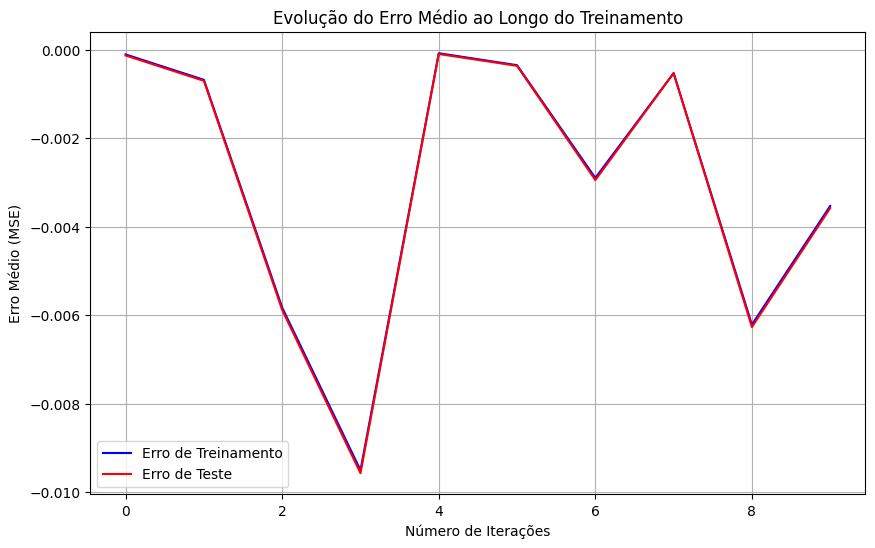

Erro quadrático médio (MSE) com os melhores parâmetros: 5.3286332585228866e-05


In [5]:
import matplotlib.pyplot as plt

train_errors = random_search.cv_results_['mean_train_score']
test_errors = random_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Erro de Treinamento', color='blue')
plt.plot(test_errors, label='Erro de Teste', color='red')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro Médio (MSE)')
plt.title('Evolução do Erro Médio ao Longo do Treinamento')
plt.legend()
plt.grid(True)
plt.show()

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio (MSE) com os melhores parâmetros:", mse)

In [6]:
import pickle

with open('models/mlp.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!
